In [3]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
import imgaug.augmenters as iaa
import cv2
import statistics

In [21]:
dic = "high_resolution"

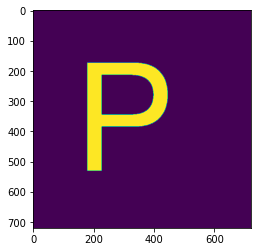

In [22]:
P = cv2.imread(dic + "/P.png",0)
_, P = cv2.threshold(P, 128, 255, cv2.THRESH_BINARY_INV)
plt.imshow(P) 

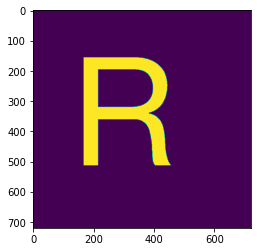

In [24]:
R = cv2.imread(dic + '/R.png',0)
_, R = cv2.threshold(R, 128, 255, cv2.THRESH_BINARY_INV)
plt.imshow(R)

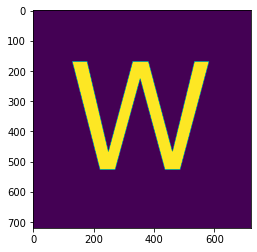

In [25]:
W = cv2.imread(dic + '/W.png',0)
_, W = cv2.threshold(W, 128, 255, cv2.THRESH_BINARY_INV)
plt.imshow(W)

In [26]:
seq = iaa.Sequential([
    iaa.Sometimes(
        0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-90, 90),
    )
], random_order=True)

In [27]:
P_cs = [seq(images=np.array(P)) for _ in range(10)]
W_cs = [seq(images=np.array(W)) for _ in range(10)]
R_cs = [seq(images=np.array(R)) for _ in range(10)]

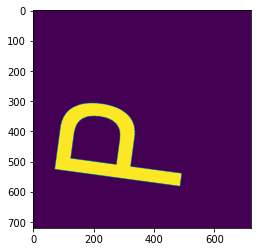

In [28]:
plt.imshow(P_cs[0])

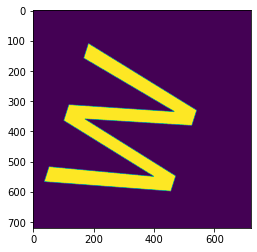

In [29]:
plt.imshow(W_cs[0])

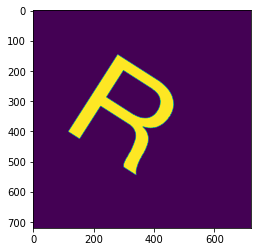

In [30]:
plt.imshow(R_cs[9])

In [43]:
def get_hu_moments(imgs, names, hu_nr):
    results = {}
    for i in range(len(imgs)):
        results[names[i]] = {}
        for j in range(len(imgs[i])):
            moments = cv2.moments(imgs[i][j])
            hu_moment = cv2.HuMoments(moments)[hu_nr][0]
            results[names[i]][j] = hu_moment
        results[names[i]]["VAR"] = statistics.variance(results[names[i]].values())
    return results

In [85]:
import pandas as pd
import math
results = [get_hu_moments([P_cs, W_cs, R_cs], ['P','W','R'], hu_nr) for hu_nr in range(7)]
dfs = [pd.DataFrame(data=result) for result in results]

In [87]:
dfs[6]

,P,W,R
0,2.210992e-20,2.613105e-22,-3.271546e-21
1,-9.940596e-21,2.554540e-22,-3.831088e-21
2,3.809289e-21,5.356738e-22,-1.701955e-21
3,2.831999e-20,1.638281e-22,-4.289868e-21
4,2.358906e-20,2.655090e-22,-4.248002e-21
5,2.580533e-20,1.912236e-22,-5.866937e-21
6,2.810433e-20,2.817471e-22,-4.547310e-21
7,2.104726e-20,6.535278e-22,-2.857172e-21
8,1.500494e-20,2.530930e-22,-2.581313e-21
9,1.495331e-20,2.070343e-22,-3.880617e-21


In [101]:
def var_by_set(set):
    results = {}
    for i in range(len(set)):
        results[set[i]] = [(dfs[x][set[i]]["VAR"]/dfs[x][set[i]][0]) for x in range(len(dfs))]
    return results

In [102]:
pd.DataFrame(data=var_by_set(["P", "W", "R"]))

,P,W,R
0,1.186305e-06,1.530948e-06,1.384203e-06
1,3.680061e-08,4.638827e-07,1.491412e-06
2,5.177741e-12,4.059933e-12,1.924407e-11
3,1.993507e-11,1.323536e-12,1.242547e-12
4,2.505890e-20,-4.753211e-22,-1.245850e-23
5,3.812754e-14,-1.115295e-14,6.126173e-14
6,6.643894e-21,9.621513e-23,-4.159979e-22


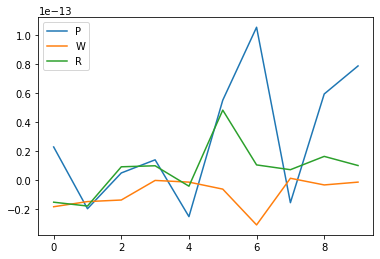

In [190]:
dfs[5].plot()